In [2]:
print('Below is an image of the Globe Explorer App page for visualization of data')

Below is an image of the Globe Explorer App page for visualization of data


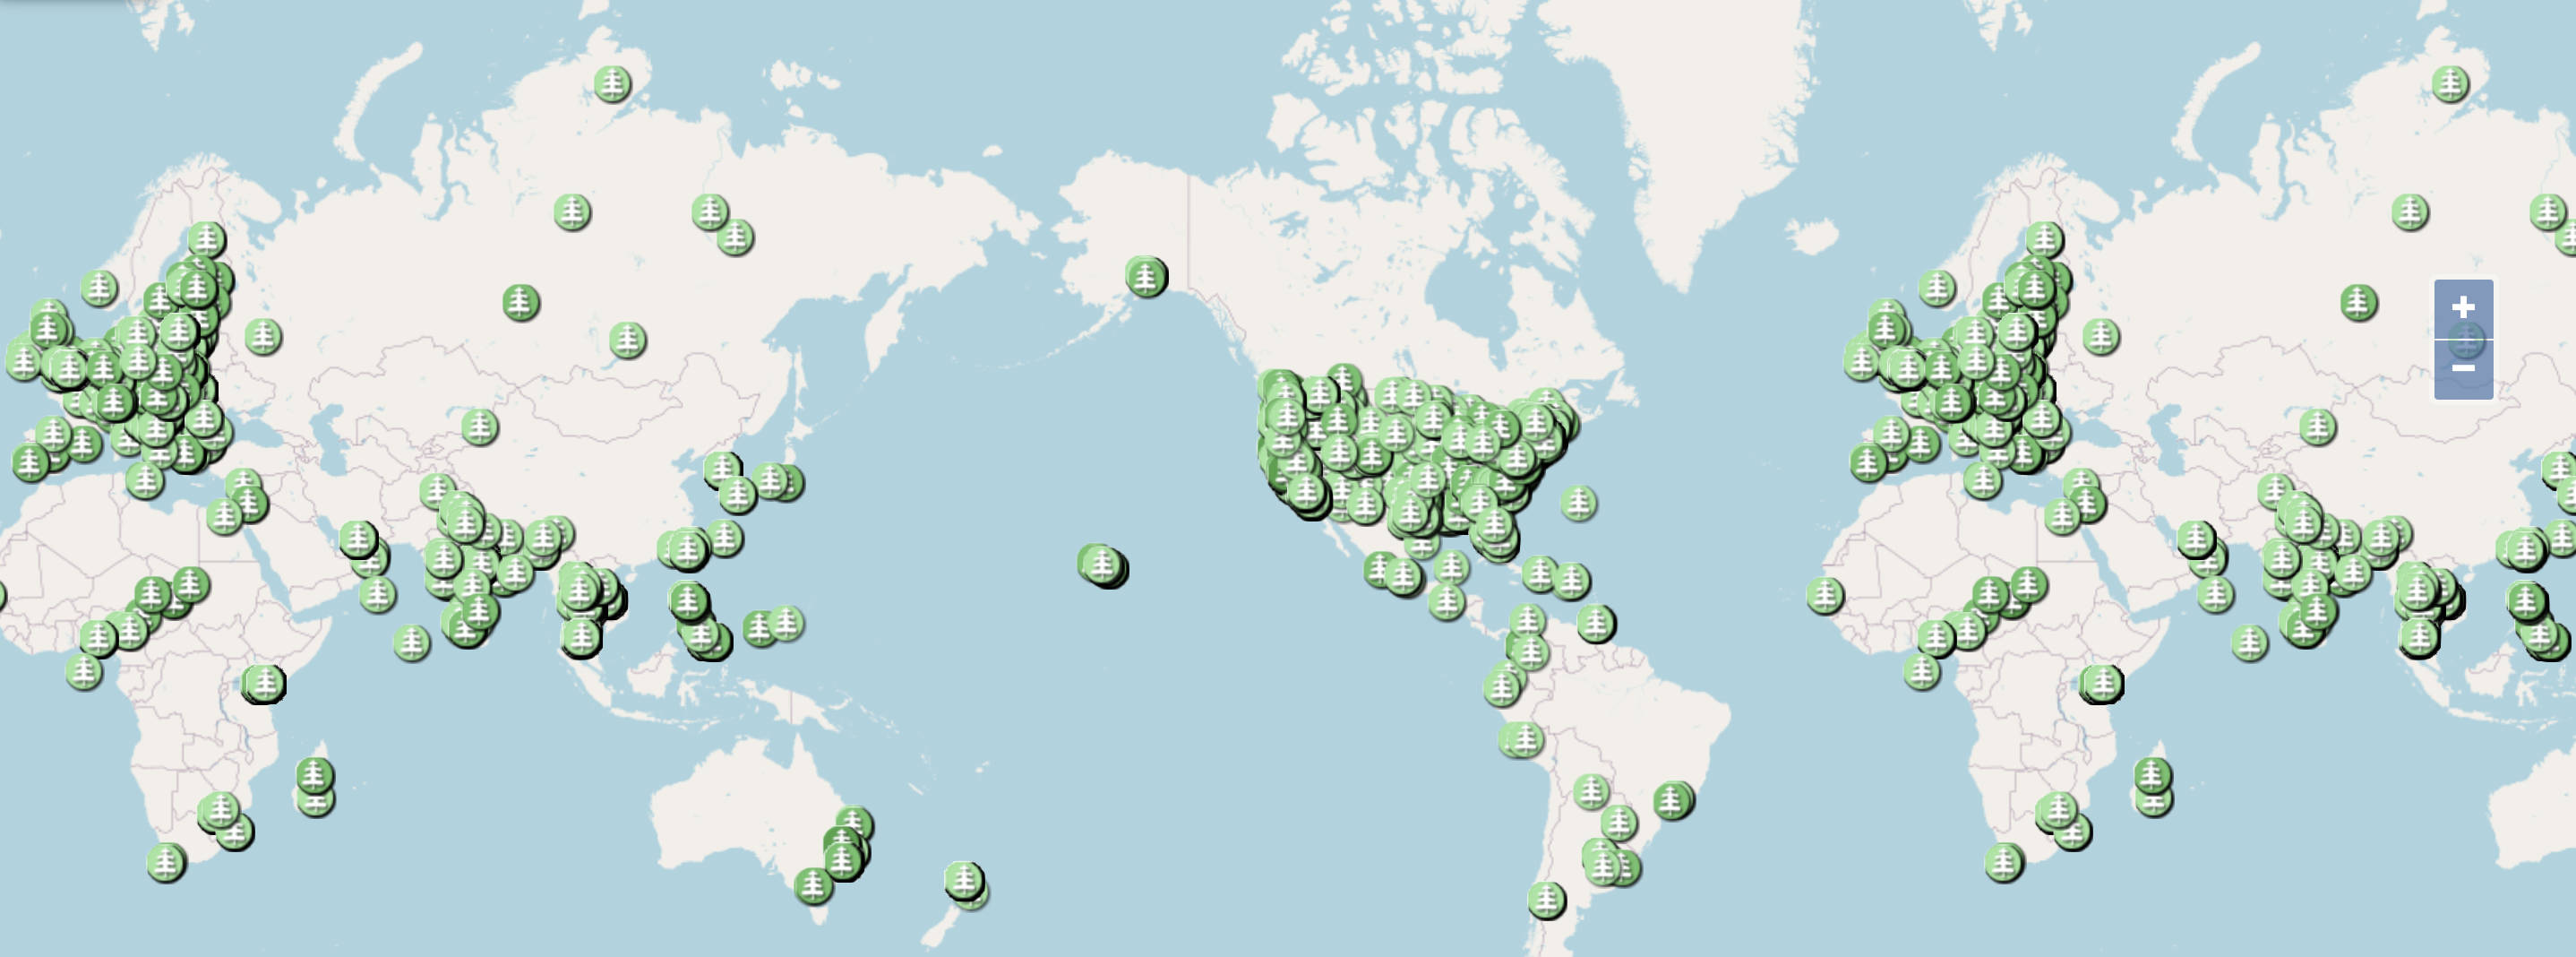

In [3]:
print('''The key observation is that the globe points are heavily clustered. Some regions are dense with 
observations, whereas other regions are quite sparse. It therefore does not make sense for us to measure in a 
uniform, grid-like pattern; rather, we need to sort the groups by clusters.''')

The key observation is that the globe points are heavily clustered. Some regions are dense with 
observations, whereas other regions are quite sparse. It therefore does not make sense for us to measure in a 
uniform, grid-like pattern; rather, we need to sort the groups by clusters.


In [4]:
print('first, let us graph the Globe points:')

first, let us graph the Globe points:


In [14]:
import pandas
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
globe_data = pandas.read_csv('dv_tree_heights_06-18-2020.csv') 
#read Globe data file
lat = globe_data['Latitude'].values.tolist()
long = globe_data['Longitude'].values.tolist()
height = globe_data['Measured Value'].values.tolist()
#convert data columnns into lists

In [23]:
globe_data.sort_values(by = 'Measured Value', ascending = False)

,School Name,Site Name,Latitude,Longitude,Elevation,Measured At,Measured Value
1773,Burr And Burton Academy,red gate trail B3 right:LCS-09,43.16160,-73.07200,699.0,2001-09-26 00:00:00,98.00
1771,Burr And Burton Academy,red gate trail B3 right:LCS-09,43.16160,-73.07200,699.0,2001-09-26 00:00:00,98.00
24051,United States of America Citizen Science,10TDL149806,41.37242,-124.01762,149.7,2019-04-27 20:19:00,96.89
6691,Hunter-Tannersville Central School,NORTH AND SOUTH LAKE GROUP 5:LCS-05,42.04120,-74.04120,600.0,1998-05-26 00:00:00,93.00
6642,Hunter-Tannersville Central School,N-S LAKE-3:BIO-02,42.19750,-74.04020,280.0,1997-09-25 00:00:00,93.00
...,...,...,...,...,...,...,...
25000,United States of America Citizen Science,17SNB266049,37.09002,-80.70069,650.4,2020-02-01 17:56:00,0.00
14700,Poland Citizen Science,34UFB078786,51.24856,22.54459,204.1,2020-03-09 12:12:00,0.00
14587,Poland Citizen Science,34UFB076786,51.24860,22.54172,208.7,2020-03-09 12:10:00,0.00
23774,United States of America Citizen Science,14SPB691357,32.84635,-97.19306,188.7,2019-04-25 18:47:00,0.00


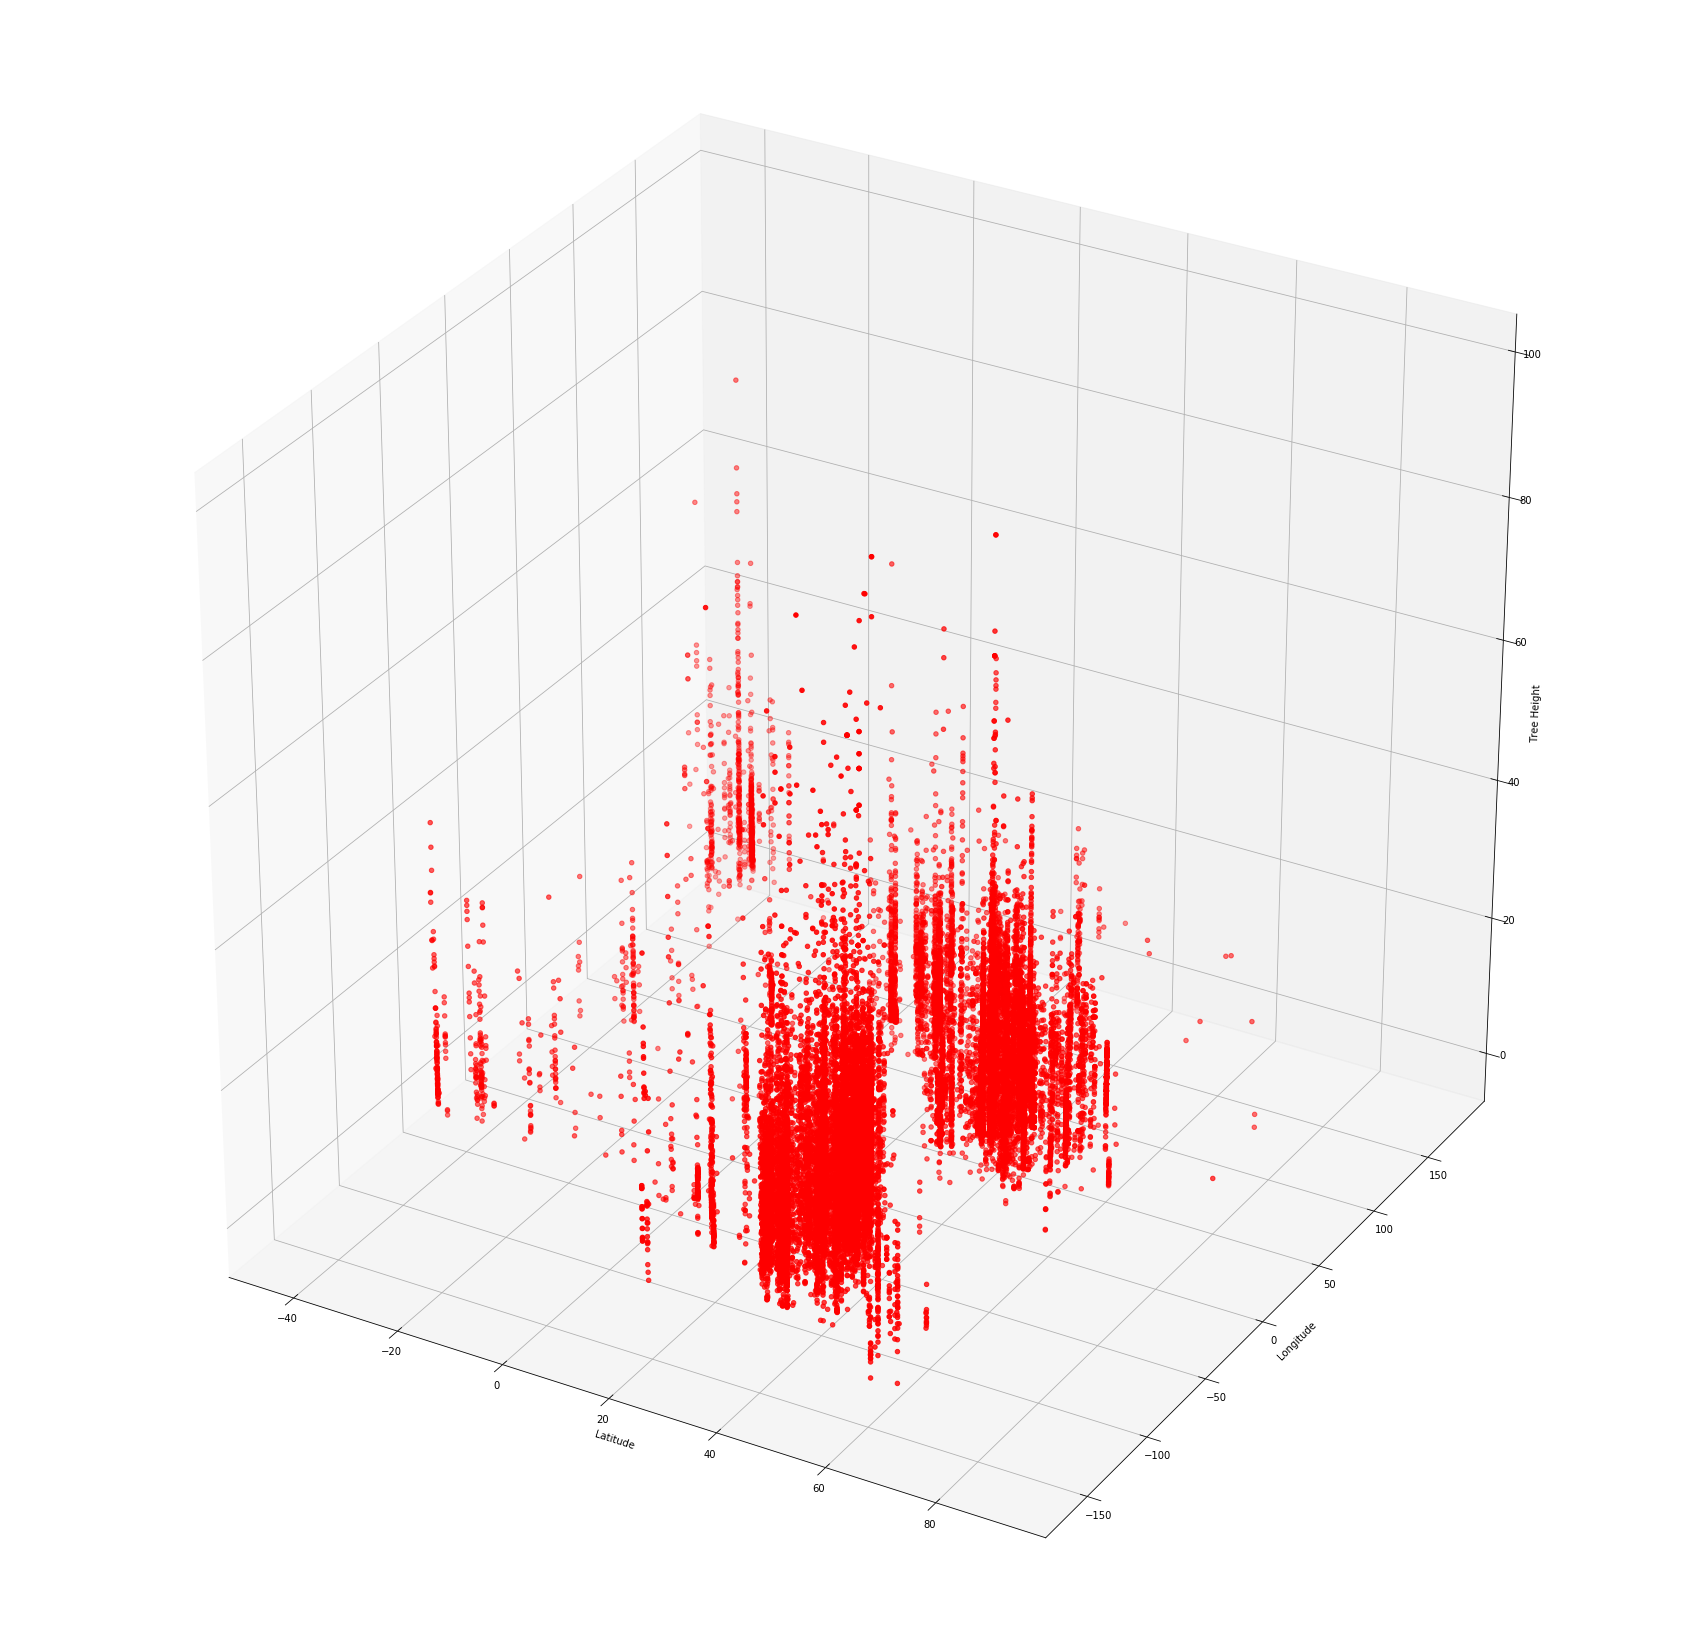

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = fig= plt.figure(figsize=(30,30))
ax = fig.add_subplot(111, projection='3d')

x = lat
y = long
z = height

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Tree Height')

plt.show()
#this function represents a relationship between position (latitude, longitude) and tree height
#per earlier remarks, the data is indeed heavily clustered: let's divide the data up into k clusters

In [8]:
print('''Now, lets build a dataframe which we can process using the k-means algorithm''')

In [ ]:
Data = {'x': lat, 'y': long, 'z': height  }
#dictionary assigns x,y,z key values to lat, long, height

In [11]:
df = DataFrame(Data,columns=['x','y', 'z'])

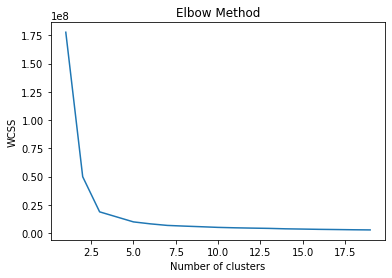

In [19]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=20, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
print('''the Elbow Method is an analytical method to determine how many clusters a group should be divided into.
The k-means algorithm is based on Voronoi Tesselation, an optimization technique which minimizes deviation between
clusters and maximizes deviation among clusters. Tne clusters are therefore homogenous sets which are 
heterogenous with each other. The Elbow method determines how many clusters the k-means algorithm should
employ. Too many clusters will lead to overfitting. The elbow of the graph gives an intuition as to the number
of clusters which should be chosen.''')

the Elbow Method is an analytical method to determine how many clusters a group should be divided into.
The k-means algorithm is based on Voronoi Tesselation, an optimization technique which minimizes deviation between
clusters and maximizes deviation among clusters. Tne clusters are therefore homogenous sets which are 
heterogenous with each other. The Elbow method determines how many clusters the k-means algorithm should
employ. Too many clusters will lead to overfitting. The elbow of the graph gives an intuition as to the number
of clusters which should be chosen.


In [29]:
kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_

print(centroids)

#we may experiment with adding more clusters in order to minimize the error of the cost function between the 
#mean of the Voronoi cell of Globe values and the cube of ICE points located very close to its location

[[  36.06683597  -80.67557243   16.60618778]
 [  18.70627273   96.85306249   10.39578719]
 [ -35.25491893  160.81041677   13.23919478]
 [  40.38274032 -120.39400416   15.44502938]
 [  46.70146942   16.86964478   16.31040479]]


In [ ]:
#ie run the cost function, calculate average error
#--> increase number of clusters, run cost function again
#essentially employ gradient descent, with (k = clusters) as the parameter theta
#we want to find the optimal number of clusters in order to minimize error between Globe and ICE;
#and then report the minimal error as the expected value for error, E(X) = expected error